# Movie reviews Classification

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/rev.png" width="1200">



In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.datasets import load_files

import warnings
warnings.filterwarnings('ignore')

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip

--2023-05-23 10:55:13--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/txt_sentoken.zip
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.143.54
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.143.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2781673 (2.7M) [application/octet-stream]
Saving to: ‘txt_sentoken.zip’

txt_sentoken.zip    100%[===================>]   2.65M  3.99MB/s    in 0.7s    

2023-05-23 10:55:14 (3.99 MB/s) - ‘txt_sentoken.zip’ saved [2781673/2781673]



In [3]:
!unzip txt_sentoken.zip

Archive:  txt_sentoken.zip
   creating: txt_sentoken/
   creating: txt_sentoken/neg/
  inflating: txt_sentoken/neg/cv000_29416.txt  
  inflating: txt_sentoken/neg/cv001_19502.txt  
  inflating: txt_sentoken/neg/cv002_17424.txt  
  inflating: txt_sentoken/neg/cv003_12683.txt  
  inflating: txt_sentoken/neg/cv004_12641.txt  
  inflating: txt_sentoken/neg/cv005_29357.txt  
  inflating: txt_sentoken/neg/cv006_17022.txt  
  inflating: txt_sentoken/neg/cv007_4992.txt  
  inflating: txt_sentoken/neg/cv008_29326.txt  
  inflating: txt_sentoken/neg/cv009_29417.txt  
  inflating: txt_sentoken/neg/cv010_29063.txt  
  inflating: txt_sentoken/neg/cv011_13044.txt  
  inflating: txt_sentoken/neg/cv012_29411.txt  
  inflating: txt_sentoken/neg/cv013_10494.txt  
  inflating: txt_sentoken/neg/cv014_15600.txt  
  inflating: txt_sentoken/neg/cv015_29356.txt  
  inflating: txt_sentoken/neg/cv016_4348.txt  
  inflating: txt_sentoken/neg/cv017_23487.txt  
  inflating: txt_sentoken/neg/cv018_21672.txt  
  inf

The load_files function automatically divides the dataset into data and target sets. For instance, in our case, we will pass it the path to the "txt_sentoken" directory. The load_files will treat each folder inside the "txt_sentoken" folder as one category and all the documents inside that folder will be assigned its corresponding category.

the load_files function loads the data from both "neg" and "pos" folders into the X variable, while the target categories are stored in y. Here X is a list of 2000 string type elements where each element corresponds to single user review. Similarly, y is a numpy array of size 2000. If you print y on the screen, you will see an array of 1s and 0s. This is because, for each category, the load_files function adds a number to the target numpy array. We have two categories: "neg" and "pos", therefore 1s and 0s have been added to the target array.

In [18]:
movie_data = load_files(r"txt_sentoken")
X_, y = movie_data.data, movie_data.target

In [19]:
# X_=X_[:5]
# y =y[:5]

In [20]:
unique, counts = np.unique(y, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 999]
 [  1 414]]


In [21]:
X_

Output hidden; open in https://colab.research.google.com to view.

In [22]:
# List of regex patterns for symbols
patterns = [
            r'[^\w\s]', 
            r'[!@#$%<.*?>]+', #Remove simbols Remove HTML tags/markups
            r'\s+s\s+',  # Remove s
            r'\s+t\s+',  # Remove t
            r'\d',      #matches any digit from 0 to 100000..., \D matches non-digits
            r'\b\w{1,2}\b',#remove all token less than2 characters
            r'\s+',    #Remove extra space and tabs
            ] 

# Define a function to clean symbols using regex
def clean_symbols(item):
    cleaned_item = item.decode('utf-8')  # Convert byte string to regular string
    for pattern in patterns:
        cleaned_item = re.sub(pattern, ' ', cleaned_item)
    return cleaned_item.lower()

# Apply the function to each element in the list
list(map(clean_symbols, X_))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_ = list(map(clean_symbols, X_))
X_

In [15]:
text = ''.join(X_)

## Wordcloud cleaned text

(-0.5, 799.5, 399.5, -0.5)

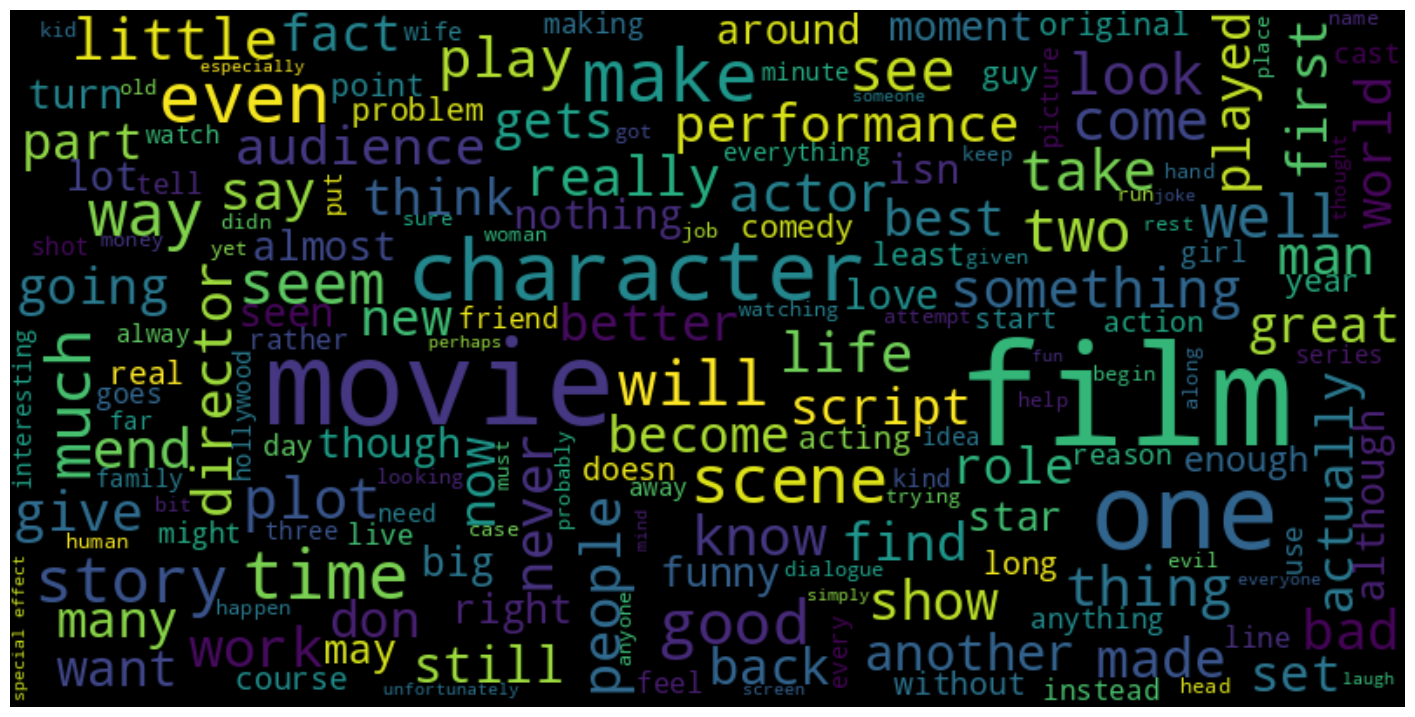

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Load the English language model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Define a set of stopwords for faster membership checks
stop_words = set(STOP_WORDS)

# Define a function for lemmatization and stopword removal
def preprocess_text(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_.lower() for token in doc if not token.is_punct and token.text.lower() not in stop_words]
    return lemmatized_text

# Apply the preprocess_text function to each element in the list
preprocessed_list = [preprocess_text(text) for text in X_]

# Convert the preprocessed list back to strings
X_ = [' '.join(tokens) for tokens in preprocessed_list]
X_

['lisa cholodenko high art intelligent quiet drama strong quality aside notch central performance perceptive way film write cholodenko observe character flawed people troubled judge judge character picture creative misstep filmmaker part matter bad deserve negatively judge involve problem break free syd radha mitchell year old woman live longtime boyfriend james gabriel mann recently award ideal job high profile photography magazine frame enjoy career head take seriously manager give petty job know important thing night take bath syd notice leak come apartment go inform meet lucy beliner ally sheedy thin wear unhappy woman live drug addicted german girlfriend greta patricia clarkson pathetic actress usually conciousness syd quickly strike conversation lucy discover acclaimed photographer year lucy claim doesn want profession syd manage convince frame editor piece work syd begin grow deep feeling lucy previously attract woman lucy start battle personal demon high art effective motion pi

## CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
X = vectorizer.fit_transform(X_).toarray()
X

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## TF-IDF
he TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".The term frequency is calculated as:

- Term frequency = (Number of Occurrences of a word)/(Total words in the document)

- IDF(word) = Log((Total number of documents)/(Number of documents containing the word))



In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
#you can do the BOW + TF-IDF all in one with TfidfVectorizer

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
# X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
train_scores, test_scores = [],[]
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(random_state=667, n_estimators=200,max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_y_pred = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_y_pred)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_y_pred = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_y_pred)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth

plt.figure(figsize=(18,10))
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

## Try with MultinomialNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train) 

MultinomialNB()

In [ ]:
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8050847457627118


Text(95.72222222222221, 0.5, 'Actual')

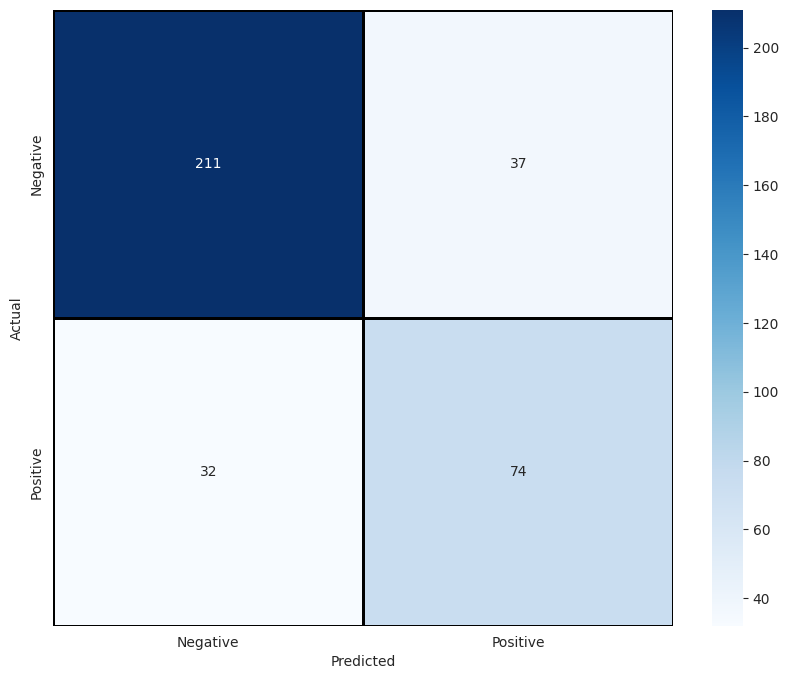

In [ ]:
labels = ['Negative', 'Positive']

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86       248
    Positive       0.67      0.70      0.68       106

    accuracy                           0.81       354
   macro avg       0.77      0.77      0.77       354
weighted avg       0.81      0.81      0.81       354



In [ ]:
!pip install plot-metric --quiet

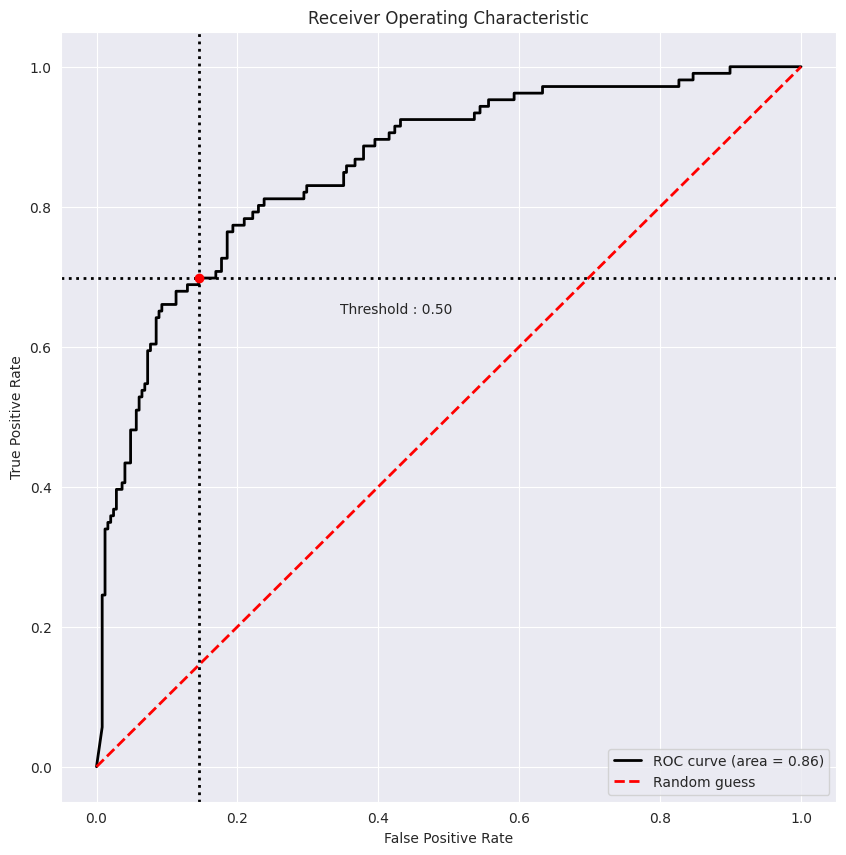

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

### SGD Classifier

In [ ]:
# accuracy score on the test data
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7937853107344632


In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.86      0.85      0.85       248
    Positive       0.65      0.67      0.66       106

    accuracy                           0.79       354
   macro avg       0.75      0.76      0.76       354
weighted avg       0.80      0.79      0.79       354



Text(95.72222222222221, 0.5, 'Actual')

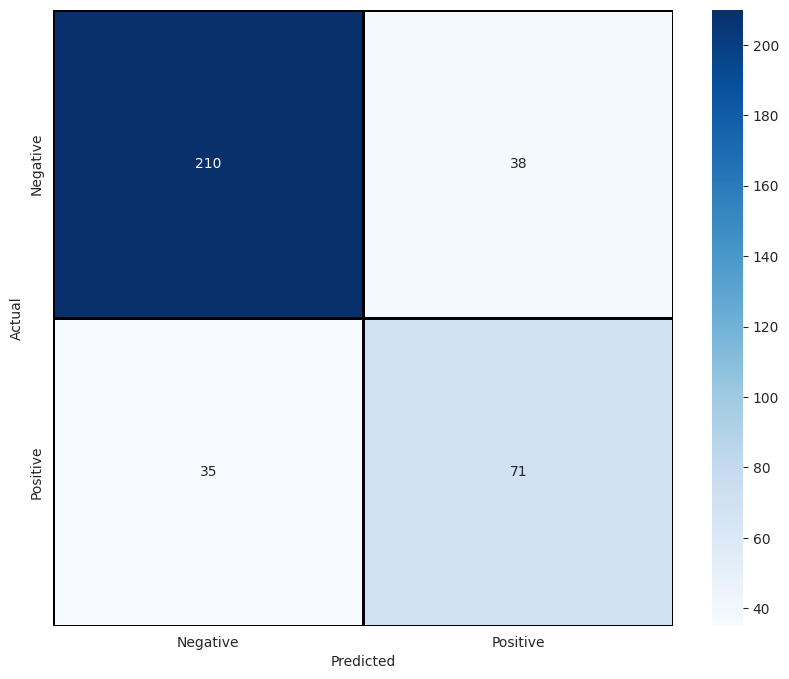

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

## Final Pipeline

In [ ]:
#X_ Feature raw data on text format
X_train, X_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.25, 
                                                    random_state=667
                                                    )

In [ ]:
from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.82      0.94      0.88       248
    Positive       0.79      0.51      0.62       106

    accuracy                           0.81       354
   macro avg       0.81      0.73      0.75       354
weighted avg       0.81      0.81      0.80       354



Text(95.72222222222221, 0.5, 'Actual')

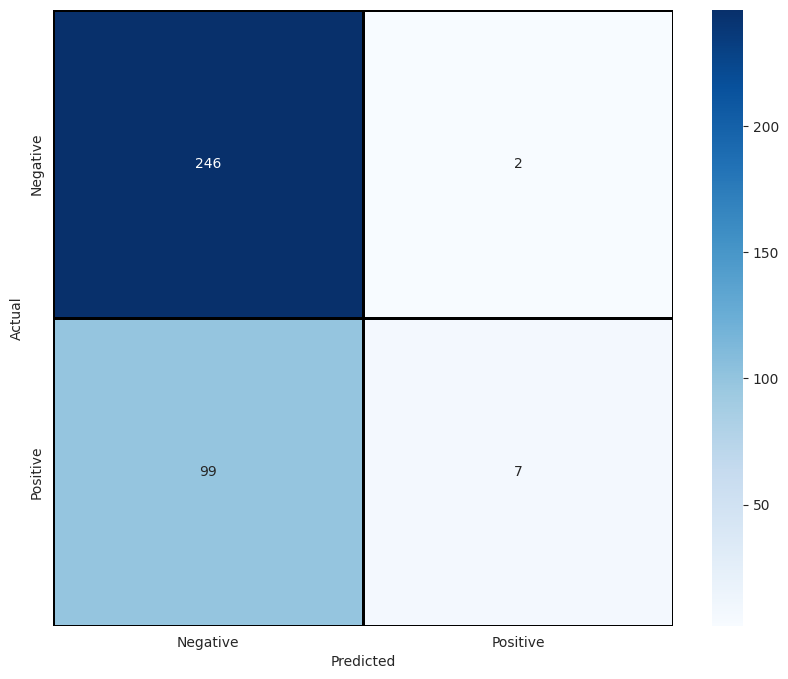

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, predicted)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

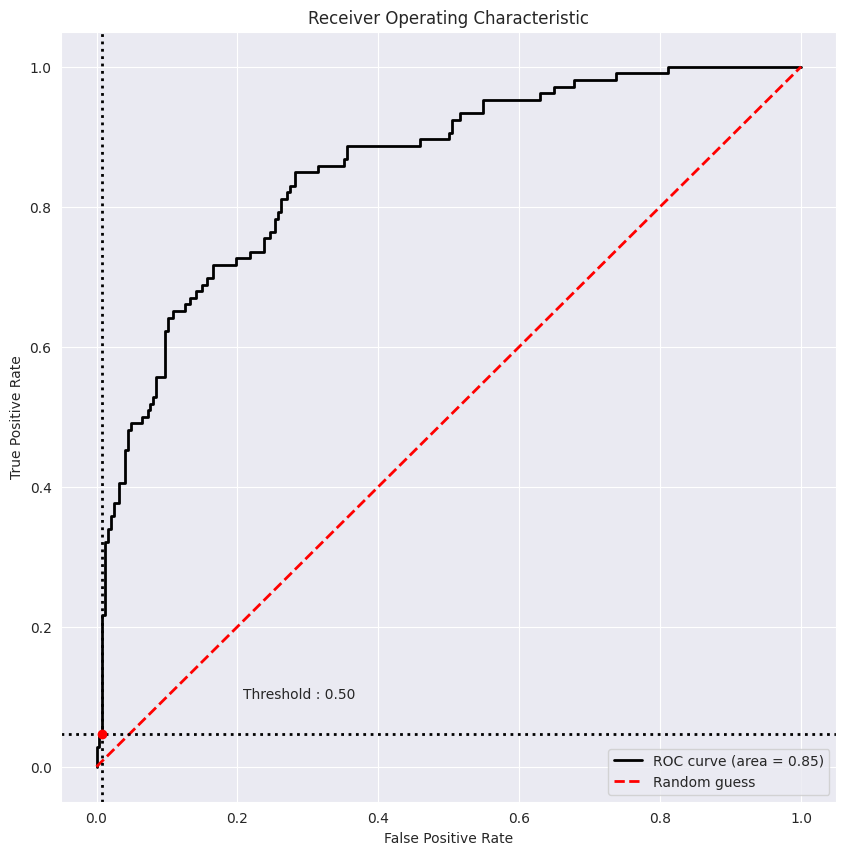

In [ ]:
from plot_metric.functions import BinaryClassification
y_pred_proba = pipe.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [ ]:
import joblib

joblib.dump(pipe,'pipeline_classifierTF_IDF.pkl')

['pipeline_classifierTF_IDF.pkl']